## Import necessary packages

In [1]:
import os
import torch as t
import matplotlib.pyplot as plt

# dataset related import
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
# dataloader
from torch.utils.data import DataLoader

# neural network related import
import torch.nn as tnn
from torch.nn import functional as F
# optimizer
import torch.optim as toptim
from tqdm import tqdm

## Process dataset

In [2]:
train_data  = CIFAR10(
    root        = "data", 
    train       = True, 
    download    = True, 
    transform   = transforms.ToTensor()
)
test_data   = CIFAR10(
    root        = "data", 
    train       = False, 
    download    = True, 
    transform   = transforms.ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


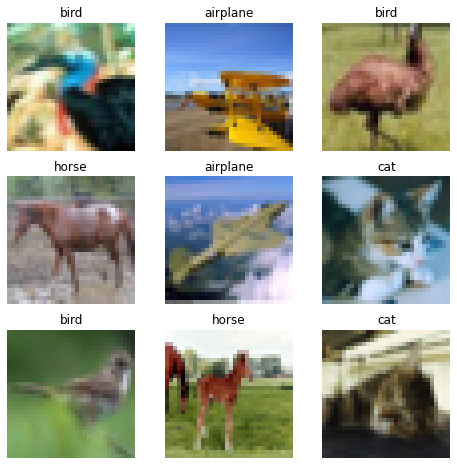

In [3]:
labels_map = {
    0: "airplane", 
    1: "automobile", 
    2: "bird", 
    3: "cat", 
    4: "deer", 
    5: "dog", 
    6: "frog", 
    7: "horse", 
    8: "ship", 
    9: "truck"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = t.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(t.moveaxis(img,0,2)) # moveaxis from (C, H, W) format into (H, W, C) format
plt.show()

## Define networks

In [4]:
class MyNetwork(tnn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = tnn.Conv2d(3, 6, 5)
        #self.pool = tnn.MaxPool2d(2, 2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return x

In [5]:
# create network
model = MyNetwork()
# define loss function
criterion = tnn.MSELoss(reduction="sum")
# define optimizer
optimizer = toptim.SGD(model.parameters(), lr=1e-8, momentum=0.9)

## Training phase

In [6]:
# define batch size for training
batch_size = 1

# create data loader
train_dataloader    = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader     = DataLoader(test_data, batch_size=batch_size, shuffle=True)

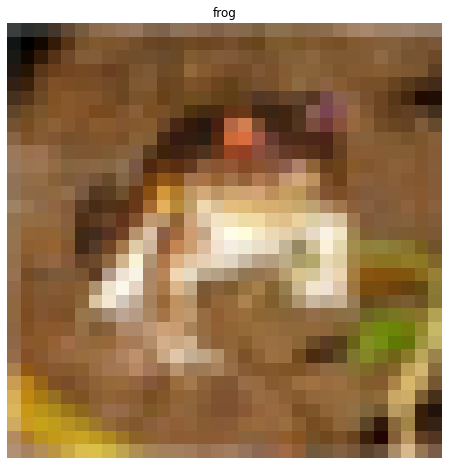

In [7]:
# Test visualize data
img_frog, lbl_frog = train_data[0]
figure = plt.figure(figsize=(8, 8))
plt.title(labels_map[lbl_frog])
plt.axis("off")
plt.imshow(t.moveaxis(img_frog,0,2))

torch.Size([1, 3, 32, 32])
<class 'torch.Tensor'>
torch.Size([1, 6, 30, 30])
<class 'torch.Tensor'>


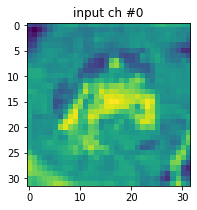

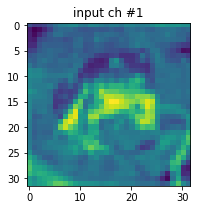

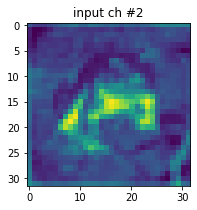

In [17]:
optimizer.zero_grad() # set grad to zero
m = tnn.Conv2d(3, 6, 3)
b = t.unsqueeze(img_frog, 0) # treat single image as batch image with size 1
#b = t.randn(10, 3, 32, 32) # random tensor
print(b.shape)
print(type(b))
outputs = m(b) # do forward pass
print(outputs.shape)
print(type(outputs))
#print(outputs)

plt.rcParams["figure.figsize"] = (20,3)

# Visualize each channel of input image
for ch in range(b.shape[1]):
    plt.figure()
    plt.imshow(b[0,ch,:,:])
    plt.title(f"input ch #{ch}")


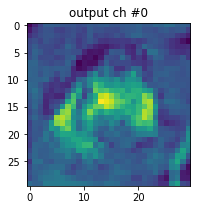

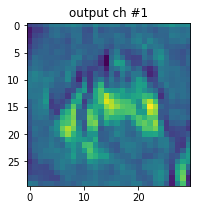

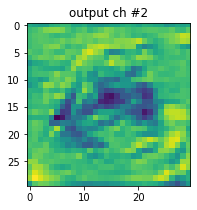

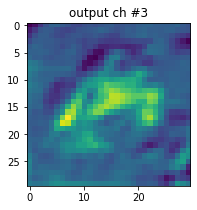

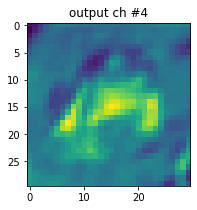

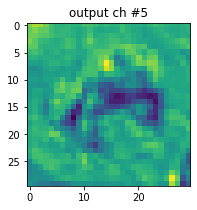

In [18]:
# Visualize each output channel of conv2d module
feature = outputs.data.numpy() # get convolved data as numpy array
for ch in range(feature.shape[1]):
    plt.figure()
    plt.imshow(feature[0,ch,:,:])
    plt.title(f"output ch #{ch}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([6, 3, 3, 3])
(6,)
Bias #0: 0.08729903399944305
Bias #1: -0.07876167446374893
Bias #2: -0.1408708095550537
Bias #3: -0.13672403991222382
Bias #4: -0.011419624090194702
Bias #5: -0.056290194392204285
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])


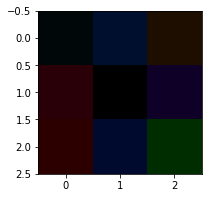

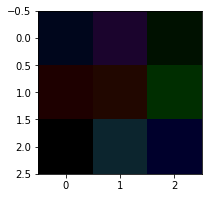

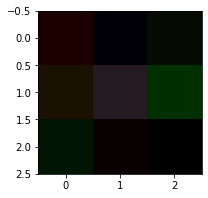

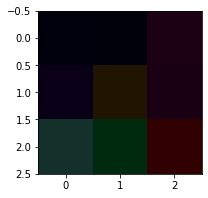

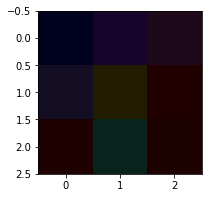

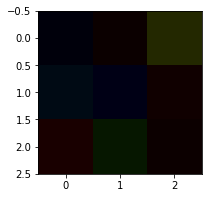

In [34]:
kernel = m.weight.data # visualize filter/kernel, we get kernel as Torch Tensor
bias = m.bias.data.numpy() # this is numpy data
# kernel format [number_of_filters, input_channels, height, width]
print(kernel.shape)
print(bias.shape)

for i in range(bias.shape[0]):
    print(f"Bias #{i}: {bias[i]}")

# NOTE: Is it necessary to visualize kernel learned?
for o in range(kernel.shape[0]):
    plt.figure()
    print(kernel[o].shape)
    plt.imshow(kernel[o].moveaxis(0,2))

## Backward propagation

In [ ]:
# Lets continue on other file

In [2]:
# Numerical example of CNN process
img = t.randint(2, size=(1, 1, 3, 3))
img = img / 2 # normalize tensor
print("original image", img)
conv = tnn.Conv2d(1, 1, 2)
print("convolution unit", conv)
weight = conv.weight.data.numpy()
print("initial filter weight",weight) # random filter
bias = conv.bias.data.numpy() # random bias
print("initial bias", bias)
res = conv(img)
print("image after convolution", res)

# generate reference label
ref = t.randn(1, 1, 2, 2)
print("reference label", ref)

original image tensor([[[[0.5000, 0.0000, 0.0000],
          [0.5000, 0.0000, 0.5000],
          [0.5000, 0.0000, 0.0000]]]])
convolution unit Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1))
initial filter weight [[[[-0.2728371   0.18143249]
   [ 0.00880301  0.1567474 ]]]]
initial bias [-0.28272623]
image after convolution tensor([[[[-0.4147, -0.2044],
          [-0.4147, -0.1920]]]], grad_fn=<ThnnConv2DBackward>)
reference label tensor([[[[ 0.4717,  0.3604],
          [ 0.4634, -0.4466]]]])


In [4]:
# calculate loss
loss = (res-ref).pow(2).sum()
print("MSE error between convolved image and reference (manual)", loss)
loss = tnn.MSELoss(reduction="sum")(res, ref) # compare convolved image with original image
print("MSE error between convolved image and reference", loss)

# do backward propagation
loss.backward()

MSE error between convolved image and reference (manual) tensor(1.9406, grad_fn=<SumBackward0>)
MSE error between convolved image and reference tensor(1.9406, grad_fn=<MseLossBackward>)


In [6]:
with t.no_grad():
    conv.bias -= conv.bias.grad
    conv.weight -= conv.weight.grad
    bias = conv.bias.data.numpy()
    weight = conv.weight.data.numpy()

    print("Bias after backward propagation", bias)
    print("Weight after backward propagation", weight)

Bias after backward propagation [3.8666325]
Weight after backward propagation [[[[ 1.4917119  -0.07316861]
   [ 1.7733519   0.7214789 ]]]]


In [7]:
print(conv.bias.grad)
print(conv.weight.grad)

tensor([-4.1494])
tensor([[[[-1.7645,  0.2546],
          [-1.7645, -0.5647]]]])


In [12]:
grad_y_pred = 2.0 * (res - ref)
print(grad_y_pred)
grad_bias = grad_y_pred.sum()
print(grad_bias)
grad_weight = (grad_y_pred * res)
print(grad_weight)

tensor([[[[-1.7729, -1.1295],
          [-1.7562,  0.5092]]]], grad_fn=<MulBackward0>)
tensor(-4.1494, grad_fn=<SumBackward0>)
tensor([[[[ 0.7353,  0.2308],
          [ 0.7284, -0.0978]]]], grad_fn=<MulBackward0>)


In [ ]:
# for each epoch
for ep in range(1):
    running_loss = 0.0

    # forward pass for each batch of image start from index 0
    for i, data in tqdm(enumerate(train_dataloader)):
        # get input and label data for traing networks for each batch
        inputs, labels = data

        # zero gradient before computing gradient
        optimizer.zero_grad()

        # do forward propagation
        outputs = model(inputs)
    
        # calculate loss for each batch
        loss = criterion(outputs, labels)

        # do backward propagation
        loss.backward()

        # Update weight using optimizer.step()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (ep + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')